In [24]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import requests
from datetime import datetime
from citipy import citipy

In [25]:
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fae543a187910989cb0078c9c9ab572c


In [26]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [27]:
coordinates = list(lat_lngs)

In [28]:
# Use the tuple function to display the latitude and longitude combinatio
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0],coordinate[1]).country_code)


ushuaia ar
vaini to
kaitangata nz
carnarvon au
rikitea pf
nome us
port lincoln au
ushuaia ar
hobart au
bredasdorp za
georgetown sh
ituni gy
hilo us
ocna de fier ro
hilo us
georgetown sh
alamos mx
khani ru
hithadhoo mv
taolanaro mg
albany au
seydisehir tr
cape town za
ushuaia ar
rikitea pf
mataura pf
ribeira grande pt
cidreira br
burhar in
mataura pf
kapaa us
ancud cl
taolanaro mg
svatove ua
onega ru
bonfim br
tura ru
kavieng pg
kavaratti in
agadez ne
tiksi ru
bucerias mx
bredasdorp za
thompson ca
rikitea pf
gulshat kz
butaritari ki
naze jp
terra santa br
san policarpo ph
barentsburg sj
rikitea pf
busselton au
qaanaaq gl
ancud cl
albany au
dingle ie
vaini to
conde br
barrow us
hobart au
cape town za
grootfontein na
bubaque gw
illoqqortoormiut gl
ushuaia ar
khatanga ru
namatanai pg
faanui pf
naryan-mar ru
byron bay au
busselton au
castro cl
vaini to
kapaa us
dharchula in
galeana mx
puerto ayora ec
longyearbyen sj
tura ru
hilo us
dikson ru
yellowknife ca
bluff nz
lebu cl
corinto ni
merril

tasiilaq gl
lorengau pg
kapaa us
punta arenas cl
hermanus za
saint-pierre pm
barentsburg sj
chokurdakh ru
busselton au
hermanus za
panaba mx
yunjinghong cn
bougouni ml
ushuaia ar
bethel us
barentsburg sj
attawapiskat ca
cap malheureux mu
barrow us
barentsburg sj
attawapiskat ca
arlit ne
narsaq gl
nanortalik gl
soe id
georgetown sh
bereda so
hobart au
puerto ayora ec
butterworth za
carnarvon au
gijon es
cayenne gf
les cayes ht
tura ru
bluff nz
hobart au
bandarbeyla so
rikitea pf
tlahualilo mx
barrow us
yeppoon au
yellowknife ca
astorga es
barentsburg sj
bethel us
mar del plata ar
bengkulu id
albany au
bilibino ru
iberia pe
dwarka in
galesong id
cape town za
adrar dz
fevralsk ru
kawhia nz
butaritari ki
avarua ck
cape town za
punta arenas cl
ratnapura lk
tasiilaq gl
albany au
kahului us
dikson ru
bria cf
gore et
jamestown sh
ushuaia ar
mahebourg mu
tuktoyaktuk ca
arraial do cabo br
busselton au
albany au
sola vu
ushuaia ar
belushya guba ru
marystown ca
san andres co
jamestown sh
cape town

cape town za
east london za
sao filipe cv
harper lr
tasiilaq gl
hobart au
hanzhong cn
butaritari ki
dikson ru
sao miguel do araguaia br
bambous virieux mu
punta arenas cl
butaritari ki
wenling cn
mar del plata ar
havre-saint-pierre ca
mwingi ke
seminole us
atlantic city us
la orilla mx
beringovskiy ru
mataura pf
pandan ph
mataura pf
mersing my
iqaluit ca
taolanaro mg
adre td
norman wells ca
mar del plata ar
mbanza-ngungu cd
kruisfontein za
albany au
tupik ru
fare pf
kargasok ru
ribeira grande pt
alice springs au
torbay ca
terrace ca


In [29]:
# 
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

647

In [30]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i%50 == 0 and i > 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | nome
Processing Record 7 of Set 1 | port lincoln
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | ituni
City not found. Skipping...
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | ocna de fier
Processing Record 14 of Set 1 | alamos
Processing Record 15 of Set 1 | khani
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | seydisehir
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | ri

Processing Record 39 of Set 3 | limbang
Processing Record 40 of Set 3 | arraial do cabo
Processing Record 41 of Set 3 | russell
Processing Record 42 of Set 3 | guerrero negro
Processing Record 43 of Set 3 | qaqortoq
Processing Record 44 of Set 3 | doha
Processing Record 45 of Set 3 | visalia
Processing Record 46 of Set 3 | souillac
Processing Record 47 of Set 3 | cabo san lucas
Processing Record 48 of Set 3 | praia
Processing Record 49 of Set 3 | klaksvik
Processing Record 50 of Set 3 | kungurtug
Processing Record 1 of Set 4 | burns lake
Processing Record 2 of Set 4 | teknaf
Processing Record 3 of Set 4 | saleaula
City not found. Skipping...
Processing Record 4 of Set 4 | cururupu
Processing Record 5 of Set 4 | skagastrond
City not found. Skipping...
Processing Record 6 of Set 4 | barabai
Processing Record 7 of Set 4 | abrau-dyurso
Processing Record 8 of Set 4 | brae
Processing Record 9 of Set 4 | dunedin
Processing Record 10 of Set 4 | betsiamites
Processing Record 11 of Set 4 | saran

Processing Record 24 of Set 7 | vibo valentia
Processing Record 25 of Set 7 | novyy urengoy
Processing Record 26 of Set 7 | bambous virieux
Processing Record 27 of Set 7 | lucapa
Processing Record 28 of Set 7 | yerbogachen
Processing Record 29 of Set 7 | durham
Processing Record 30 of Set 7 | hurricane
Processing Record 31 of Set 7 | umm kaddadah
Processing Record 32 of Set 7 | lorengau
Processing Record 33 of Set 7 | saint-pierre
Processing Record 34 of Set 7 | panaba
Processing Record 35 of Set 7 | yunjinghong
City not found. Skipping...
Processing Record 36 of Set 7 | bougouni
Processing Record 37 of Set 7 | arlit
Processing Record 38 of Set 7 | narsaq
Processing Record 39 of Set 7 | nanortalik
Processing Record 40 of Set 7 | soe
Processing Record 41 of Set 7 | butterworth
Processing Record 42 of Set 7 | gijon
Processing Record 43 of Set 7 | cayenne
Processing Record 44 of Set 7 | les cayes
Processing Record 45 of Set 7 | bandarbeyla
Processing Record 46 of Set 7 | tlahualilo
City n

Processing Record 13 of Set 11 | svetlogorsk
Processing Record 14 of Set 11 | lodwar
Processing Record 15 of Set 11 | mombetsu
Processing Record 16 of Set 11 | viedma
Processing Record 17 of Set 11 | okhotsk
Processing Record 18 of Set 11 | lata
Processing Record 19 of Set 11 | itoman
Processing Record 20 of Set 11 | mindelo
Processing Record 21 of Set 11 | afua
Processing Record 22 of Set 11 | inta
Processing Record 23 of Set 11 | nemuro
Processing Record 24 of Set 11 | ustyuzhna
Processing Record 25 of Set 11 | mikun
Processing Record 26 of Set 11 | mount gambier
Processing Record 27 of Set 11 | gao
Processing Record 28 of Set 11 | porangatu
Processing Record 29 of Set 11 | svetlaya
Processing Record 30 of Set 11 | pont-rouge
Processing Record 31 of Set 11 | san antonio
Processing Record 32 of Set 11 | crystal lake
Processing Record 33 of Set 11 | pisco
Processing Record 34 of Set 11 | kupang
Processing Record 35 of Set 11 | talcahuano
Processing Record 36 of Set 11 | obarsia-closani

In [39]:
len(city_data)

583

In [40]:
df = pd.DataFrame(city_data)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.60,61,20,18.41,AR,2021-03-30 23:55:50
1,Vaini,-21.2000,-175.2000,86.00,79,40,10.36,TO,2021-03-30 23:55:50
2,Kaitangata,-46.2817,169.8464,61.79,70,79,5.68,NZ,2021-03-30 23:52:17
3,Carnarvon,-24.8667,113.6333,77.00,78,45,9.22,AU,2021-03-30 23:55:50
4,Rikitea,-23.1203,-134.9692,78.78,69,6,14.45,PF,2021-03-30 23:55:51


In [41]:
new_col_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
df = df[new_col_order]
df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-03-30 23:55:50,-54.8000,-68.3000,44.60,61,20,18.41
1,Vaini,TO,2021-03-30 23:55:50,-21.2000,-175.2000,86.00,79,40,10.36
2,Kaitangata,NZ,2021-03-30 23:52:17,-46.2817,169.8464,61.79,70,79,5.68
3,Carnarvon,AU,2021-03-30 23:55:50,-24.8667,113.6333,77.00,78,45,9.22
4,Rikitea,PF,2021-03-30 23:55:51,-23.1203,-134.9692,78.78,69,6,14.45


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = df["Lat"]
max_temps = df["Max Temp"]
humidity = df["Humidity"]
cloudiness = df["Cloudiness"]
wind_speed = df["Wind Speed"]

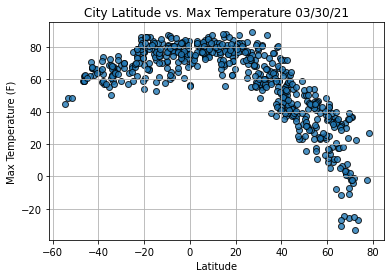

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

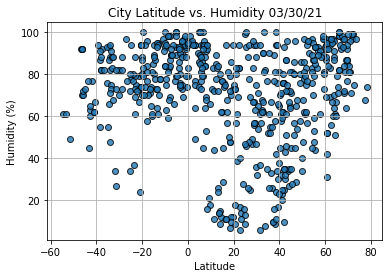

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

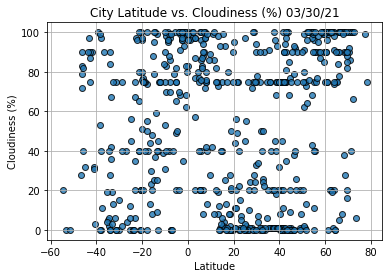

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()